In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
#from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
years1 = [f"{x:04d}" for x in range(150,500,10)]
years2 = [f"{x:04d}" for x in range(159,509,10)]
i =0
result = np.zeros((4200))

In [3]:
350*12

4200

In [4]:
for yy,mm in zip(years1,years2):
   

        data=nc.Dataset('/Users/xiliangdiao/Downloads/ice-snow/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.snow.'+yy+'01-'+mm+'12.nc')
        plotvar = data.variables['snow'][:,247:365,700:1300]
        #lont = data.variables['TLON']
        #latt = data.variables['TLAT']
        #plotvar = plotvar[247:365,800:1100]
        #plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        result[i*120:(i+1)*120] = aveplot
        
        i = i + 1
#********************************************************************

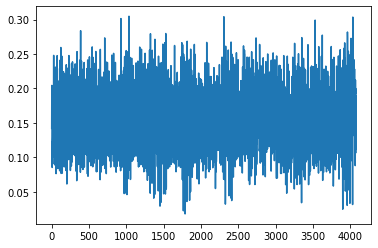

In [5]:
plt.plot(result[120:])

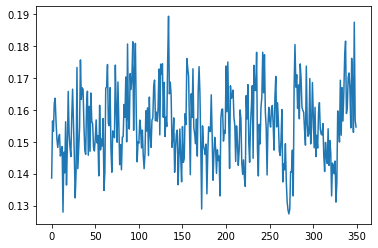

In [7]:
d4 = result.reshape(350,12)
dmean = np.nanmean(d4,axis=1)
plt.plot(dmean)

In [8]:
ww2 = np.convolve(dmean, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww2)

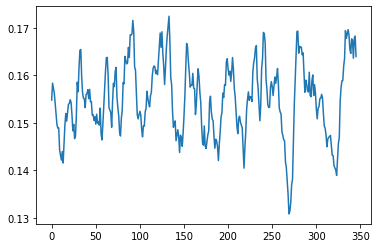

In [9]:
plt.plot(ww2)

In [10]:
np.savetxt('icesnow.out', ww2)

In [11]:
np.savetxt('icesnow2.out', dmean)